In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#to import first execute this command in the bash
# cp drive/MyDrive/fabric_classification/Fabric_Classification/my_utils.py .
import my_utils

In [ ]:
#based of https://www.tensorflow.org/tutorials/load_data/images
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import re
import pathlib
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

path = "/content/drive/MyDrive/fabric_classification/Fabrics_adjusted"

data_dir = pathlib.Path(path)

In [ ]:
batch_size = 32
img_height = 400
img_width = 400

train_ds, val_ds, class_names = my_utils.generate_ds(data_dir, batch_size, img_height, img_width)

print(class_names)

Found 4692 files belonging to 6 classes.
Using 3754 files for training.
Found 4692 files belonging to 6 classes.
Using 938 files for validation.
['Cotton', 'Denim', 'Nylon', 'Polyester', 'Silk', 'Wool']


In [ ]:
#data augmentation based of https://keras.io/examples/vision/image_classification_from_scratch/

#the augmentations to make
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(0.5)
    ]
)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
#based of https://www.tensorflow.org/tutorials/load_data/images
num_classes = 6

norm = 0.00005
dropout_val = 0.0

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, input_shape=(32, 400, 400, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(norm)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(norm)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(norm)),
  tf.keras.layers.Dropout(dropout_val),
  
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

checkpoint = my_utils.generate_callback("/content/drive/MyDrive/fabric_classification/", "Model-3d-Aug-fs")

hist = model.fit(
    train_ds, 
    validation_data = val_ds, 
    epochs = 150, 
    verbose = 1, 
    callbacks = [checkpoint])

model.summary()

Epoch 1/50
118/118 [==============================] - ETA: 0s - loss: 1.9739 - accuracy: 0.5096
Epoch 1: val_accuracy improved from -inf to 0.54691, saving model to /content/drive/MyDrive/fabric_classification/a_model_Aug_V4.h5
118/118 [==============================] - 28s 183ms/step - loss: 1.9739 - accuracy: 0.5096 - val_loss: 1.5278 - val_accuracy: 0.5469
Epoch 2/50
117/118 [============================>.] - ETA: 0s - loss: 1.4093 - accuracy: 0.5726
Epoch 2: val_accuracy improved from 0.54691 to 0.56930, saving model to /content/drive/MyDrive/fabric_classification/a_model_Aug_V4.h5
118/118 [==============================] - 16s 136ms/step - loss: 1.4083 - accuracy: 0.5730 - val_loss: 1.3756 - val_accuracy: 0.5693
Epoch 3/50
117/118 [============================>.] - ETA: 0s - loss: 1.3405 - accuracy: 0.5775
Epoch 3: val_accuracy improved from 0.56930 to 0.58635, saving model to /content/drive/MyDrive/fabric_classification/a_model_Aug_V4.h5
118/118 [==============================] -

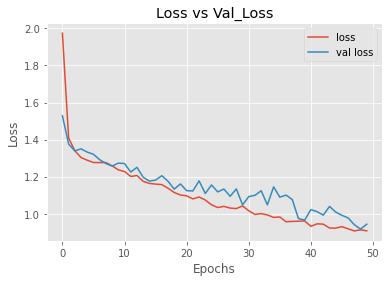

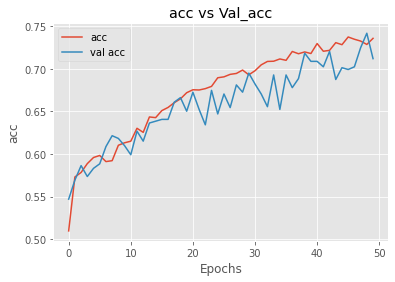

In [ ]:
my_utils.generate_plot(hist)

(938, 6)
(938,)
(938,)
[[379  23   2  33   0   8]
 [ 22 112   0   1   0   3]
 [ 14   1  12   8   3   2]
 [ 41   2   5 123  20   3]
 [  3   0   0  11  26   0]
 [ 41   2   0  22   0  16]]


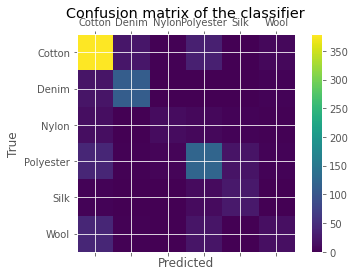

In [ ]:
my_utils.generate_cm(model, val_ds, class_names)